In [1]:
import numpy as np 
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, 
        postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM houseprices', con = engine)

engine.dispose()

df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [3]:
df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [5]:
#sns.pairplot(df)  #This cell is taking a long time

In [6]:
corr_matrix = df.corr() #This cell took a while

In [7]:
#Created a correlation matrix
corr_matrix

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
mssubclass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
lotfrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
lotarea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
overallqual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
overallcond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
masvnrarea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
bsmtfinsf1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [8]:
#The target variable is saleprice, which is the 38th column and with 
#0 based indexing I select all rows and ,37 for the column
corr_matrix.iloc[:,37].sort_values()

kitchenabvgr    -0.135907
enclosedporch   -0.128578
mssubclass      -0.084284
overallcond     -0.077856
yrsold          -0.028923
lowqualfinsf    -0.025606
id              -0.021917
miscval         -0.021190
bsmthalfbath    -0.016844
bsmtfinsf2      -0.011378
threessnporch    0.044584
mosold           0.046432
poolarea         0.092404
screenporch      0.111447
bedroomabvgr     0.168213
bsmtunfsf        0.214479
bsmtfullbath     0.227122
lotarea          0.263843
halfbath         0.284108
openporchsf      0.315856
secondflrsf      0.319334
wooddecksf       0.324413
lotfrontage      0.351799
bsmtfinsf1       0.386420
fireplaces       0.466929
masvnrarea       0.477493
garageyrblt      0.486362
yearremodadd     0.507101
yearbuilt        0.522897
totrmsabvgrd     0.533723
fullbath         0.560664
firstflrsf       0.605852
totalbsmtsf      0.613581
garagearea       0.623431
garagecars       0.640409
grlivarea        0.708624
overallqual      0.790982
saleprice        1.000000
Name: salepr

## Results of correlation matrix

Some of the columns have a correlation that is close to zero.  For this I am going to use columns that have a correlation with an absolute value above .1.  At least I was thinking of this before I decided to try a heatmap and see what happens. 

Factors that seem significant. 

yearremodadd     0.507101
yearbuilt        0.522897
totrmsabvgrd     0.533723
fullbath         0.560664
firstflrsf       0.605852
totalbsmtsf      0.613581
garagearea       0.623431
garagecars       0.640409
grlivarea        0.708624
overallqual      0.790982


In [9]:
#sns.heatmap(df)
#This command did not work due to the nan values which I forgot to look at 
#in detail. Some of the columns have so few values as to be useless

In [10]:
cleaned_df = df[['yearremodadd', 'yearbuilt', 'totrmsabvgrd', 'fullbath', 
                'firstflrsf', 'totalbsmtsf', 'garagearea', 'garagecars',
                'grlivarea', 'overallqual','saleprice']]

In [11]:
cleaned_df.isna().sum()

yearremodadd    0
yearbuilt       0
totrmsabvgrd    0
fullbath        0
firstflrsf      0
totalbsmtsf     0
garagearea      0
garagecars      0
grlivarea       0
overallqual     0
saleprice       0
dtype: int64

The below cell does not work even though I thought I cleaned out the NA's so I don't know what else to do with that. I am going to ask Noyuki Wednesday to help me out with this one. 

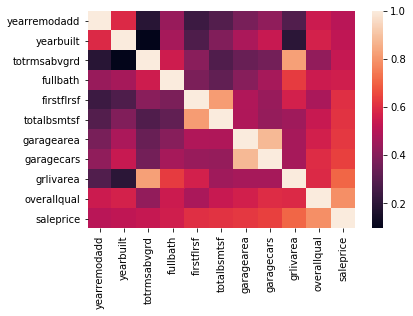

In [12]:
sns.heatmap(cleaned_df.corr()) 

In [13]:
Y = cleaned_df['saleprice']

X = cleaned_df[['yearremodadd', 'yearbuilt', 'totrmsabvgrd', 'fullbath', 
                'firstflrsf', 'totalbsmtsf', 'garagearea', 'garagecars',
                'grlivarea', 'overallqual']]

lrm = linear_model.LinearRegression()

lrm.fit(X,Y)

print('Coefficients:', lrm.coef_)
print('Intercept:', lrm.intercept_)

Coefficients: [ 2.96481161e+02  2.68240707e+02  3.31050771e+01 -6.79087146e+03
  1.41737355e+01  1.98650991e+01  1.49475334e+01  1.04179010e+04
  5.12971178e+01  1.96045898e+04]
Intercept: -1186193.7666662922


In [14]:
import statsmodels.api as sm

#We need to add a constant in statsmodels' sm

X2 = sm.add_constant(X)

results = sm.OLS(Y,X2).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        16:42:00   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187      0.000   -1.44e+06   -9.33e+05
yearremodadd   296.4812     63.635      4.659      0.000     171.655     421.307
yearbuilt      268.2407     50.346      5.328      0.000     169.481     367.000
totrmsabvgrd    33.1051   1119.061      0.030      0.976   -2162.048    2228.258
fullbath     -6790.8715   2682.369     -2.532      0.011   -1.21e+04   -1529.130
firstflrsf      14.1737      4.930      2.875      0.004       4.504      23.844
totalbsmtsf     19.8651      4.295      4.625      0.000      11.439      28.291
garagearea      14.9475     10.311      1.450      0.147      -5.279      35.174
garagecars    1.042e+04   3044.272      3.422      0.001    4446.249    1.64e+04
grlivarea       51.2971      4.233     12.119      0.000      42.994      59.600
overallqual    1.96e+04   1190.159     16.472      0.000    1.73e+04    2.19e+04
==============================================================================
Omnibus:                      477.814   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58906.279
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                      34.107   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
predictions = lrm.predict(X)


errors = Y - predictions

print(np.mean(errors))

2.1528860885803012e-11


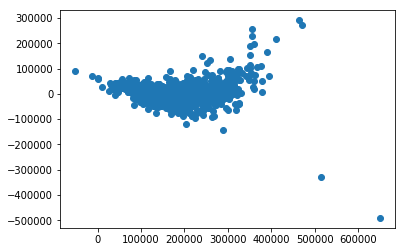

In [16]:
plt.scatter(predictions, errors)

Seems to be a bit skewed to me so looks heteroscedastic 

In [17]:
#Using the levene and Bartlett tests now
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)
print(bart_stats)
print(lev_stats)

BartlettResult(statistic=519.4420048758425, pvalue=5.59681874856163e-115)
LeveneResult(statistic=525.3606091607766, pvalue=4.772625573317832e-107)


Both tests involve p values lower then .05 so null hypothesis is rejected and our errors are heterscedastic

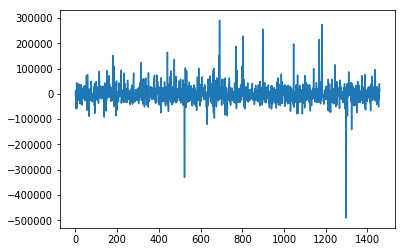

In [18]:
plt.plot(errors)

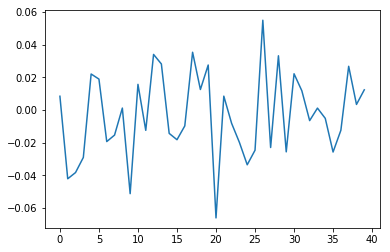

In [19]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

Autocorrelation at least is quite low so that's pointing towards homoscedastity

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.140e+02,
        1.079e+03, 5.200e+01, 6.000e+00, 5.000e+00]),
 array([-489957.82501266, -411906.22009807, -333854.61518348,
        -255803.01026889, -177751.40535429,  -99699.8004397 ,
         -21648.19552511,   56403.40938948,  134455.01430408,
         212506.61921867,  290558.22413326]),
 <a list of 10 Patch objects>)

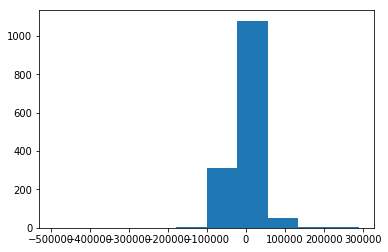

In [20]:
plt.hist(errors)
#Definitely not a normal distribution

In [21]:
Y = cleaned_df['saleprice']

X = cleaned_df[['yearremodadd', 'yearbuilt', 'fullbath', 
                'firstflrsf', 'totalbsmtsf',  'garagecars',
                'grlivarea', 'overallqual']]

lrm = linear_model.LinearRegression()

lrm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
import statsmodels.api as sm

#We need to add a constant in statsmodels' sm

X2 = sm.add_constant(X)

results = sm.OLS(Y,X2).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     618.9
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        16:42:01   Log-Likelihood:                -17460.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1451   BIC:                         3.499e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.188e+06   1.28e+05     -9.255      0.000   -1.44e+06   -9.36e+05
yearremodadd   295.7406     63.618      4.649      0.000     170.947     420.534
yearbuilt      269.8900     50.169      5.380      0.000     171.478     368.302
fullbath     -7183.7785   2643.957     -2.717      0.007   -1.24e+04   -1997.392
firstflrsf      14.6512      4.919      2.979      0.003       5.002      24.300
totalbsmtsf     20.3847      4.269      4.775      0.000      12.010      28.759
garagecars    1.395e+04   1816.623      7.680      0.000    1.04e+04    1.75e+04
grlivarea       51.7669      3.097     16.714      0.000      45.692      57.842
overallqual   1.959e+04   1188.062     16.486      0.000    1.73e+04    2.19e+04
==============================================================================
Omnibus:                      462.446   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54365.371
Skew:                          -0.355   Prob(JB):                         0.00
Kurtosis:                      32.886   Cond. No.                     4.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Why do I have a negative coefficient on fullbath?  It would mean that more full baths decreases the price which just...wat?

The R squared slightly decreased and f-statistic increased by about 120.  I think my first model is better overall. 

In [23]:
Y = cleaned_df['saleprice']

X = cleaned_df[['yearremodadd', 'yearbuilt', 'fullbath', 
                'firstflrsf', 'totalbsmtsf',  'garagecars',
                'grlivarea', 'overallqual']]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 465)

print("Observations in training set {}".format(X_train.shape[0]))
print("Observations in test set {}".format(X_test.shape[0]))

Observations in training set 1168
Observations in test set 292


In [25]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     483.5
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        16:42:01   Log-Likelihood:                -13969.
No. Observations:                1168   AIC:                         2.796e+04
Df Residuals:                    1159   BIC:                         2.800e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.091e+06   1.45e+05     -7.542   

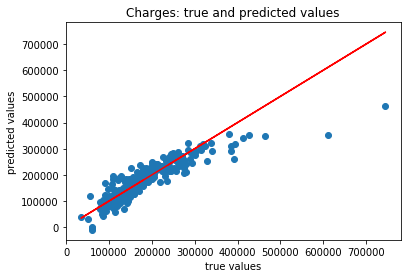

Mean absolute error of the prediction is: 24850.280681214877
Mean squared error of the prediction is: 1450276027.873988
Root mean squared error of the prediction is: 38082.48978039629
Mean absolute percentage error of the prediction is: 14.99838088977137


In [26]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = .2, random_state = 465)
print("Number of observations in training set: ", X_train.shape[0])
print("Number of observations in testing set: ", X_test.shape[0])

lrm = LinearRegression()
lrm.fit(X_train, y_train)

#Making predicitons now
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

#Statistics

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Number of observations in training set:  1168
Number of observations in testing set:  292
R-squared of the model in the training set is: 0.7694587240592807
-----Test set statistics-----
R-squared of the model in the test set is: 0.7839827298324797
Mean absolute error of the prediction is: 24850.280681214863
Mean squared error of the prediction is: 1450276027.8739862
Root mean squared error of the prediction is: 38082.48978039627
Mean absolute percentage error of the prediction is: 14.998380889771305


# Question for mentor
The R squared below is zero. I have no idea why

In [31]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

#Now making predictions
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
#R-squared is zero??? Wat?

R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0016183407463286061
Mean absolute error of the prediction is: 58023.64411709514
Mean squared error of the prediction is: 6724569139.943377
Root mean squared error of the prediction is: 82003.47029207592
Mean absolute percentage error of the prediction is: 36.65964810134902


# Question
R-squared is 0 again for all models. Still confused about this. 

In [32]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0016183407463286061
Mean absolute error of the prediction is: 58023.64411709514
Mean squared error of the prediction is: 6724569139.943377
Root mean squared error of the prediction is: 82003.47029207592
Mean absolute percentage error of the prediction is: 36.65964810134902


In [33]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0016183407463286061
Mean absolute error of the prediction is: 58023.64411709514
Mean squared error of the prediction is: 6724569139.943377
Root mean squared error of the prediction is: 82003.47029207592
Mean absolute percentage error of the prediction is: 36.65964810134902
